# Part I - Prosper Loan Data Analysis
## by Johnny Samuel

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.





## Preliminary Wrangling


#### We Import all the needed libraries that wil be useful during our anaysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df=pd.read_csv('prosperLoanData.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# Find the shape of the data set
df.shape

(113937, 81)

In [5]:
# Give list of the column to enable us see all the columns and thus find the right columns to work with
col_list=list(df.columns)
col_list

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'ClosedDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'GroupKey',
 'DateCreditPulled',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (p

In [6]:
#### We try to observe the different columns

In [7]:
df.PercentFunded.describe()

count    113937.000000
mean          0.998584
std           0.017919
min           0.700000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.012500
Name: PercentFunded, dtype: float64

In [8]:
df.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [9]:
df.EmploymentStatusDuration.value_counts()

0.0      1534
4.0      1186
1.0      1177
3.0      1174
2.0      1153
         ... 
648.0       1
662.0       1
733.0       1
690.0       1
578.0       1
Name: EmploymentStatusDuration, Length: 605, dtype: int64

<AxesSubplot:>

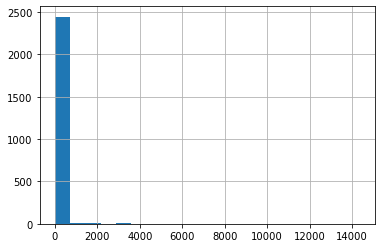

In [10]:
df.LoanOriginalAmount.value_counts().hist(bins=20)

In [11]:
df.InvestmentFromFriendsCount.value_counts()

0     111806
1       1835
2        215
3         40
4         15
5          8
9          5
6          4
8          3
7          2
33         1
20         1
15         1
13         1
Name: InvestmentFromFriendsCount, dtype: int64

In [12]:
# List of the columns we want to consider and draw inference from
loan_col=['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus','Occupation','BorrowerRate','LoanStatus']

In [13]:
# we make a new dataframe which is the subset of the dataset
loan=df[loan_col]

In [14]:
# we use the decribe function to see key statistical values for all numerical variables
loan.describe()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,BorrowerRate
count,113937.00000,113912.000000,1.139370e+05,113937.000000,113937.000000
mean,8337.01385,0.218828,5.608026e+03,40.830248,0.192764
std,6245.80058,0.080364,7.478497e+03,10.436212,0.074818
min,1000.00000,0.006530,0.000000e+00,12.000000,0.000000
25%,4000.00000,0.156290,3.200333e+03,36.000000,0.134000
50%,6500.00000,0.209760,4.666667e+03,36.000000,0.184000
75%,12000.00000,0.283810,6.825000e+03,36.000000,0.250000
max,35000.00000,0.512290,1.750003e+06,60.000000,0.497500


In [15]:
# We observe the first 5 rows of the new dataset
loan.head()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,Occupation,BorrowerRate,LoanStatus
0,9425,0.16516,3083.333333,36,NaN,Self-employed,Other,0.1580,Completed
1,10000,0.12016,6125.000000,36,A,Employed,Professional,0.0920,Current
2,3001,0.28269,2083.333333,36,NaN,Not available,Other,0.2750,Completed
3,10000,0.12528,2875.000000,36,A,Employed,Skilled Labor,0.0974,Current
4,15000,0.24614,9583.333333,36,D,Employed,Executive,0.2085,Current


### What is the structure of your dataset?

> This dataset conatins (113937 rows and 81 columns. The columns contain the vaariables that could contibute to the Loan Status

### What is/are the main feature(s) of interest in your dataset?

> The interst we want to focus on is understanding what affects the Loan Original Amount that the Borrowers Demand. We also hope to gain insight into facteors that affect the Borrowers annual Percentage Rate
 
        

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The Features we will be using to support this inference include:
* Loan Original Amount
* BorrowerAPR
* Stated Monthly Income
* Term
* Prosper Rating (Alpha)', 
* Employment Status
* Occupation
* BorrowerRate
* LoanStatus

> #### Note: for the sake of limited time we will not draw insight from all variables though they will all have some insghts that could be observed.

## Univariate Exploration


### Insight on Employment status

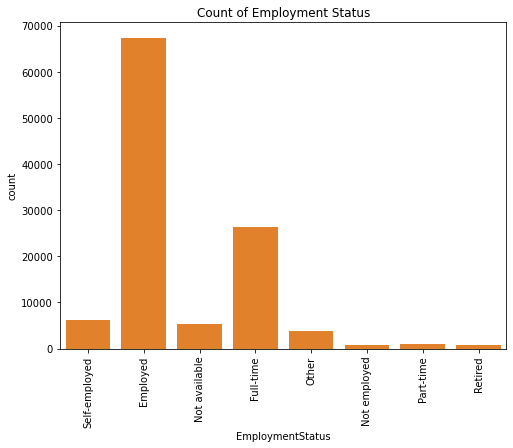

In [16]:
def employ():
    plt.figure(figsize=(8,6))
    color=sns.color_palette()[1]
    sns.countplot(data=loan, x='EmploymentStatus', color=color)
    plt.xticks(rotation=90)
    plt.title('Count of Employment Status')
    
employ()

#### Observation
> We observe that those that are *Employed* have the highest count, which is followed by the Full-time. This could be as a result of the salary they have which could serve as colateral

In [17]:
loan.Occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

### Insights from the Loan Original Amount

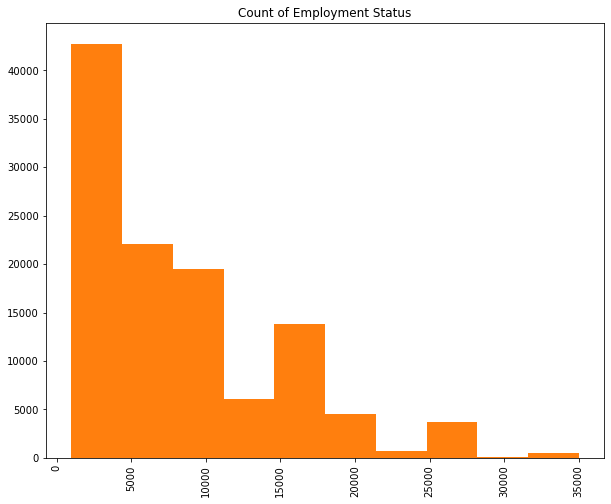

In [18]:
def loanamount():
    plt.figure(figsize=(10,8))
    color=sns.color_palette()[1]
    plt.hist(data=loan, x='LoanOriginalAmount', color=color)
    plt.xticks(rotation=90)
    plt.title('Count of Employment Status')
    
loanamount()

#### Observation
> This was a rough analysis of the the Original amount that was loaned to each Borrower, but is better interpreted below

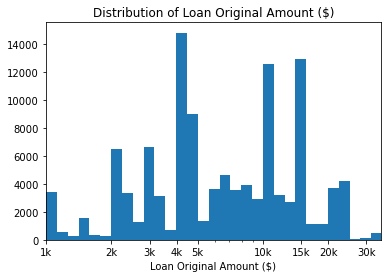

In [19]:
log_binsize = 0.05
bins_log = 10 ** np.arange(3, np.log10(loan['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins_log)
plt.xscale('log')
x_ticks = [1000, 2000, 3000, 4000, 5000, 10000, 15000,20000, 30000]
x_ticks_names = ['1k','2k', '3k', '4k', '5k', '10k','15k', '20k','30k']
plt.xticks(x_ticks, x_ticks_names)
plt.xlim((1000,35000))
plt.xlabel('Loan Original Amount ($)')
plt.title('Distribution of Loan Original Amount ($)');

#### Observation

> we discover that most of the Borrowers Collected money in multiples of five(5). This is may be due to the normal human idea mentality for easy remembring of the amount borrowed,

### Insights from the Time Frame(Month) to pay the total money borrrowed 

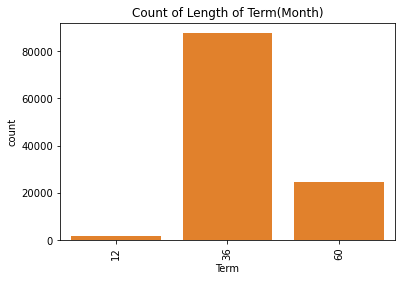

In [20]:
def term():
    #plt.figure(figsize=(8,7))
    color=sns.color_palette()[1]
    sns.countplot(data=loan, x='Term', color=color)
    plt.xticks(rotation=90)
    plt.title('Count of Length of Term(Month)');
    
term()

#### Observation 

> Its observed that majority of the borrrowers settled to pay the money within 3 years, this may be because of the Employment status of each borrower it could have been easier to pay within 3 years than one year but making it five(5) year will also include extra cost for intrest.

### Insights from the Prosper Rating (Alpha)

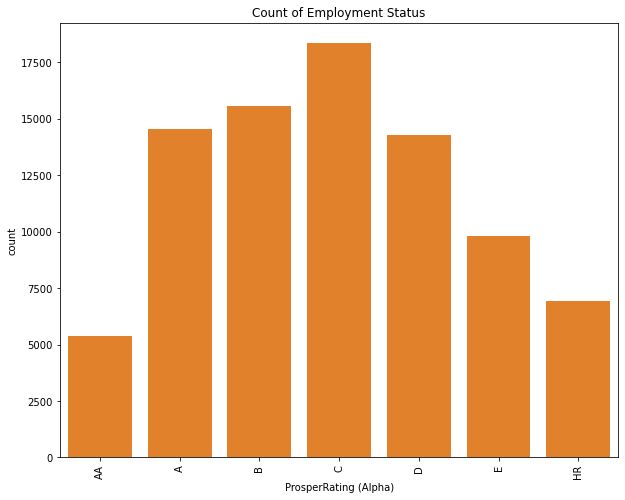

In [21]:
rate_order = ['AA','A','B','C','D','E','HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loan['ProsperRating (Alpha)'] = loan['ProsperRating (Alpha)'].astype(ordered_var)

def prosper():
    plt.figure(figsize=(10,8))
    base_color=sns.color_palette()[1]
    sns.countplot(data=loan, x='ProsperRating (Alpha)', color=base_color)
    plt.xticks(rotation=90)
    plt.title('Count of Employment Status');
    
prosper()

#### Observation

> Notes: It is observed that Prosper Rating of C has the maximum number of borrowers thid is followed by B, A and D in that order

### Insights into Occupation

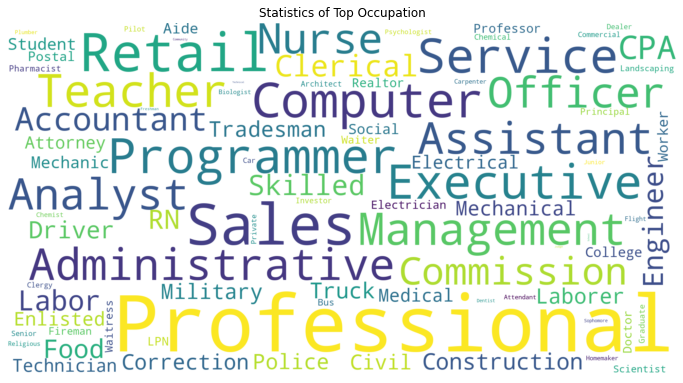

In [22]:
# creating the text variable
text1 = loan.loc[:, 'Occupation'].str.cat(others=None, sep=' ')
# Creating word_cloud with text as argument in .generate() method

word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text1)
# saving the image
word_cloud1.to_file('map.png')

# Display the generated Word Cloud
plt.figure(figsize=(12,8))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.title('Statistics of Top Occupation')
plt.show()

#### Onservations
> Because of the differnt occupation by the borrowers it will be easier to use word cloud to get the occupation of most borrowers, they seem to be Professsionals, Computer Programmers and Executives

### Insights into Stated Monthly Income

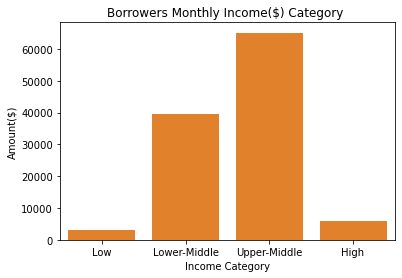

In [23]:
# cateegorise the stated monthly income to better understand the data 
def classify(row):
    if row["StatedMonthlyIncome"]<1000:
        return 'Low'
    elif row["StatedMonthlyIncome"]<4000:
        return 'Lower-Middle'
    elif row["StatedMonthlyIncome"]<12000:
        return 'Upper-Middle'
    else:
        return 'High'
    
loan['WageGroup'] = loan.apply(classify, axis=1)

wage_cat = ['Low', 'Lower-Middle','Upper-Middle', 'High']
order_wage = pd.api.types.CategoricalDtype(ordered = True, categories = wage_cat)
loan['WageGroup'] = loan['WageGroup'].astype(order_wage)

color=sns.color_palette()[1]
sns.countplot(data = loan, x = 'WageGroup', color = color);
plt.title('Borrowers Monthly Income($) Category ')
plt.xlabel('Income Category')
plt.ylabel('Amount($)');

#### Observation
>Notes: we Observe after categorising the income amount that majority are either upper-middle or Lower-Middle Income earners.

### Insight into Borrowwer APR 

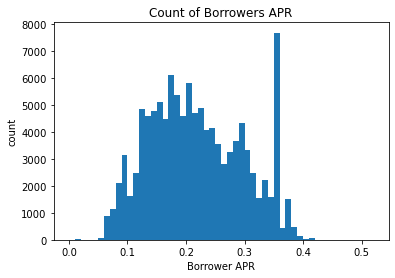

In [24]:
bins = np.arange(0, loan['BorrowerAPR'].max()+0.01, 0.01)
plt.hist(data = loan, x = 'BorrowerAPR', bins=bins);
plt.title('Count of Borrowers APR')
plt.xlabel('Borrower APR')
plt.ylabel('count');

#### Observation
> Notes: We observe that the histogram is skewed to the right with an outlier at 0.35 which may be error

### Insight into Loan Status

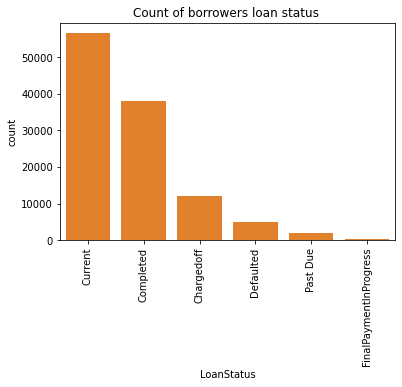

In [25]:
# we categorise all past due dates together since all is past 
loan['LoanStatus'] = loan['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

status_list = ['Defaulted','Chargedoff', 'Past Due', 'Current', 'FinalPaymentInProgress', 'Completed']

loan_status_ordering = pd.api.types.CategoricalDtype(ordered = True, categories = status_list)

loan['LoanStatus'] = loan['LoanStatus'].astype(loan_status_ordering)


status_count=loan['LoanStatus'].value_counts()
status_order=status_count.index

base_color = sns.color_palette()[1]
sns.countplot(data=loan, x='LoanStatus', color=base_color, order=status_order);
plt.title('Count of borrowers loan status ')

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90); 


#### Observation
> Notes: It is observed that majority of them are Currently still owe and a good percentage also have completed their payment. This is good since with that will prevent bankrupcy

## Bivariate Analysis

### Insight into the Term and original amount loan to them

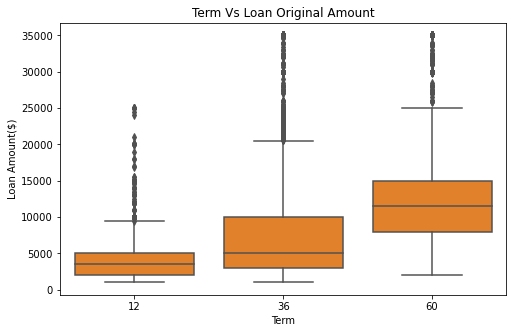

In [26]:
# plot boxplot
plt.figure(figsize = [8,5])
sns.boxplot(data = loan, x = 'Term', y = 'LoanOriginalAmount' ,color = color);
plt.title('Term Vs Loan Original Amount')
plt.ylabel('Loan Amount($)')
plt.xlabel('Term');

#### Observation
> Notes: The higher the term the higher the amount, it is also seen that the median of the three years duration is same as the maximum amount for the duration of one year, also there are outliers that make the maximum for each of the term

### Insights of Borrower Rate with Employment Status, Prosper Rating and Wage Group

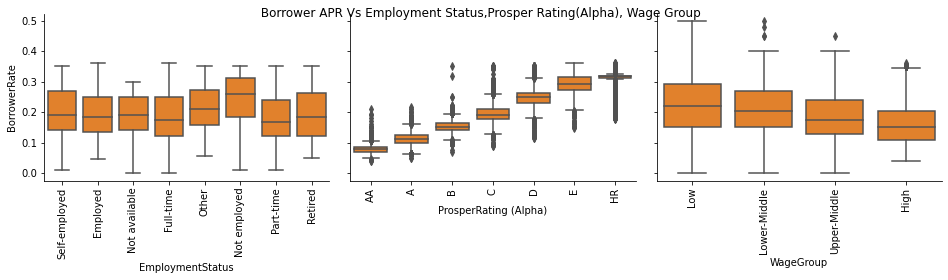

In [27]:
#define boxgrid function
def boxgrid(x, y, **kwargs):
    base_color = sns.color_palette()[1]
    sns.boxplot(x, y, color = base_color)
    plt.xticks(rotation=90);


g = sns.PairGrid(data = loan, y_vars = ['BorrowerRate'], x_vars = ['EmploymentStatus','ProsperRating (Alpha)','WageGroup'],
                size = 3, aspect = 1.5);
g.map(boxgrid);
plt.suptitle(' Borrower APR Vs Employment Status,Prosper Rating(Alpha), Wage Group');

#### Observation
> Notes:
* Those having some source of employment seems to have the same range in Borrowers Rate whille those without employment have a higher rate
* Prosper Rating has as the Prosper rating increase there is a corresonding reduction in the Borrower rate
* A decrease in the Wage group income leads to a corresponding decrease in the Borrower rate

### Insights into the Loan original amount from Employment,Prosper Rating and Wage Group

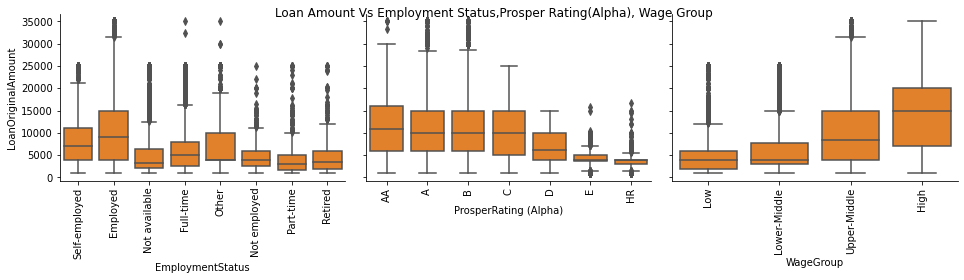

In [28]:
#define boxgrid function
def boxgrid(x, y, **kwargs):
    base_color = sns.color_palette()[1]
    sns.boxplot(x, y, color = base_color)
    plt.xticks(rotation=90);


g = sns.PairGrid(data = loan, y_vars = ['LoanOriginalAmount'], x_vars = ['EmploymentStatus','ProsperRating (Alpha)','WageGroup'],
                size = 3, aspect = 1.5);
g.map(boxgrid);
plt.ylabel('Loan Amount')
plt.suptitle('Loan Amount Vs Employment Status,Prosper Rating(Alpha), Wage Group');

#### Observation
> Notes:
* Those employed seem to collect more loan than other this is no suprise because of the steady source of income it give them the assurance of ability to pay, unlike the retiree and not-employed who also collect just small amount this will be to settle little matters.
* It is observed that those with high prosper rating also borrowed bigger amount
* It is worthy of note that the greater the borrowers Wage/Salary the greater the amount borrowed.

### Insight into the correlation between each quantities

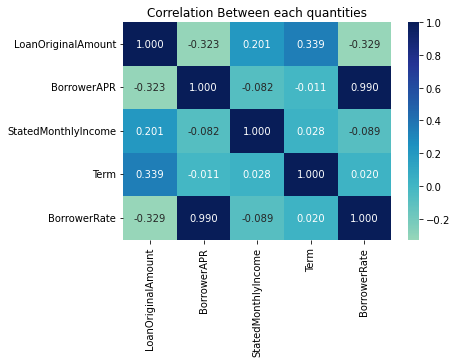

In [29]:
sns.heatmap(loan.corr(), annot = True, fmt = '.3f',
           cmap = 'YlGnBu', center=0)
plt.title('Correlation Between each quantities')
plt.show()

#### Observations
>Notes: with regards to Loan original amount; The Term has a postive correlation and further study on its contribution will be important. While with regards to BorrowerAPR there is a strong positive correlation of about 0.99

### Insight into The Loan Status with Term, and wage group

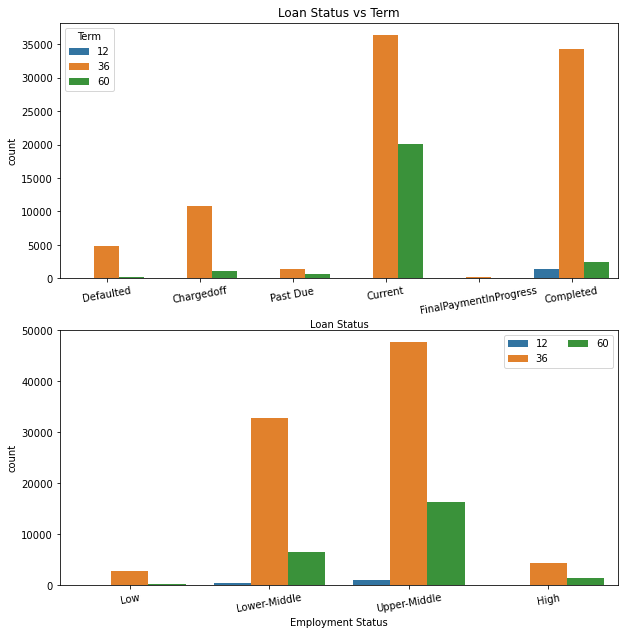

In [30]:
plt.figure(figsize = [10, 16])

# subplot 1: Loan Status vs term
plt.subplot(3, 1, 1)
sns.countplot(data = loan, x = 'LoanStatus', hue = 'Term')
plt.xticks(rotation=10)
plt.xlabel('Loan Status')
plt.title('Loan Status vs Term')
# subplot 2: Employment Status vs Wage Group
ax = plt.subplot(3, 1, 2)
sns.countplot(data = loan, x = 'WageGroup', hue = 'Term')
ax.legend(loc = 1, ncol = 2);
# re-arrange legend to remove overlapping
plt.xticks(rotation=10);
plt.xlabel('Employment Status');
#plt.title('Employment status vs Wage Group')

#### Observtion
>Notes:
   
   * We discovered that those with one year term have completed theirs and also five(5) year term is more for the current loan status
   * Also those of low income doesn't have much of the one year term this may be becuase of the monthly amount that will be collected. also unlike expected the high income earners didnt borrow over a five(5) year term.

### Insight into the Borrower APR and original amount

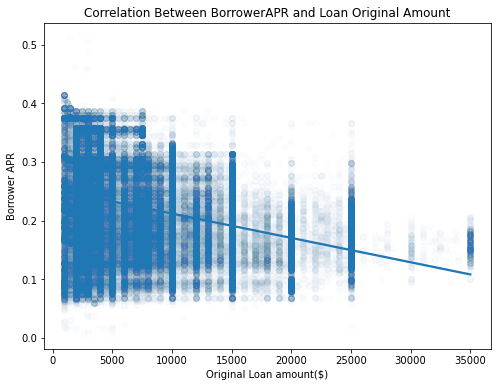

In [31]:
plt.figure(figsize = [8, 6])
sns.regplot(data = loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.title('Correlation Between BorrowerAPR and Loan Original Amount')
plt.xlabel('Original Loan amount($)')
plt.ylabel('Borrower APR');

#### Observation

> Notes:
    It is observed that it is negatively correlated that is a decrease in the loan amount leads to an increase in the BorrowerAPR

## Multivariate

### Insight into the Wage Group Loan Amount and Term

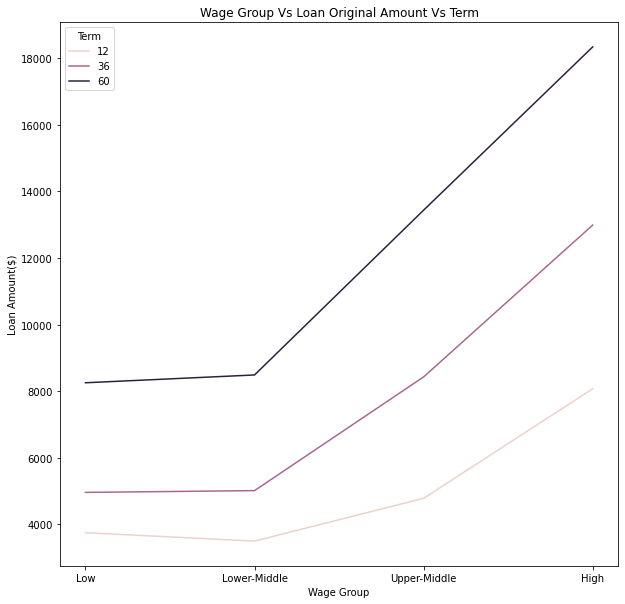

In [32]:
# we plot a line graph of wage group and loan amount against the Term
plt.figure(figsize=(10,10))
g=sns.lineplot(data=loan, x='WageGroup', y='LoanOriginalAmount', hue='Term',ci=None);
plt.title('Wage Group Vs Loan Original Amount Vs Term')
plt.ylabel('Loan Amount($)')
plt.xlabel('Wage Group');

#### Observation


> Notes: Its observed that those with higher term also borrow higher amount and also the higher the borrowers income the higher the term and the higher the amount borrowed, this should be because of the collateral they have.

### Insights into the Wage Group,Borrowerr APR and Term 

Text(0.5, 1.0, 'Wage Group Vs BorrowerAPR Vs Term')

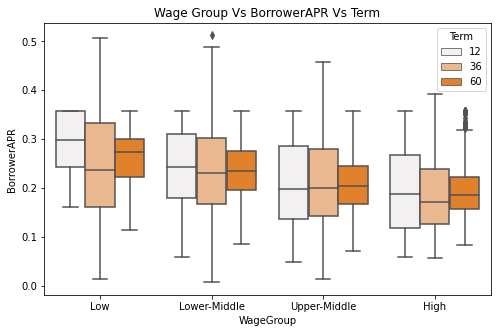

In [33]:
#plot boxplot
plt.figure(figsize = [8,5])
sns.boxplot(data = loan, x = 'WageGroup', y = 'BorrowerAPR',hue = 'Term' ,color = color);
plt.title('Wage Group Vs BorrowerAPR Vs Term')

#### Observation

>Notes: we observed that the borrower APR was higher for a year than for other term. Also the three year term has the highest borrower APR

### Insight into the loan status,Stated monthly income and the loan original amount

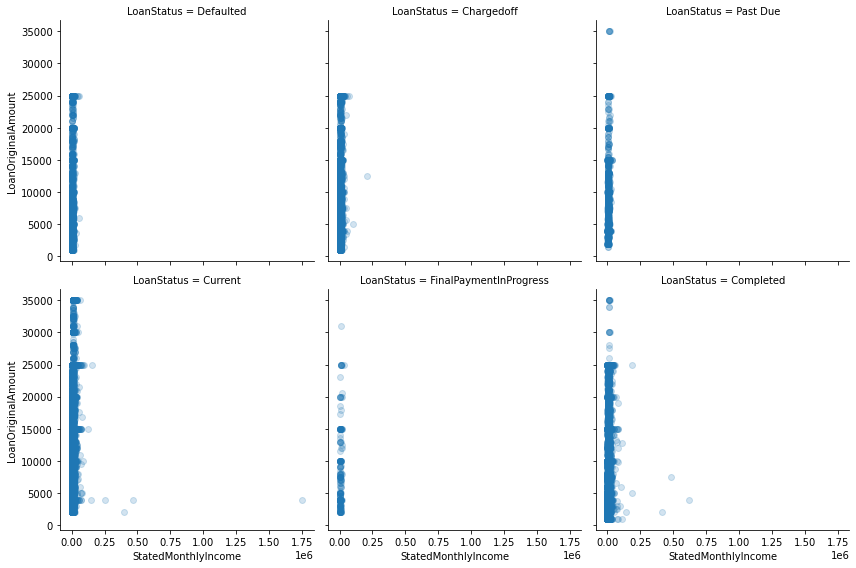

In [34]:
sedan_classes = ['Defaulted', 'Chargedoff', 'Past Due', 'Current', 'FinalPaymentInProgress','Completed']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    LoanStatuses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
    loan['LoanStatus'] = loan['LoanStatus'].astype(LoanStatuses)
else: # compatibility for v.20
    loan['LoanStatus'] = loan['LoanStatus'].astype('category', ordered = True, categories = sedan_classes)
  # plotting
g = sns.FacetGrid(data = loan, col = 'LoanStatus', size = 4, col_wrap = 3)
g.map(plt.scatter, 'StatedMonthlyIncome','LoanOriginalAmount', alpha = 1/5)


#### Observation
> Notes:we discovered that those who are currently paying the money borrowed borrow the highest mount, also those that are defaulters seems to owe for long hence the amount borrowed. Also those the arc are thinner for tose in final payment in progress this is because not many persons are in this category.

### Reference
* https://blogs.worldbank.org/opendata/new-world-bank-country-classifications-income-level-2020-2021